# ECGNet

This CNN model was taken from the repository https://github.com/Valeria-Leng/ECGNet as part of my course work https://github.com/Artemiadze/Classification-of-ECG-arrhythmias-based-on-deep-learning

In [88]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Activation



def buildModel_2DCNN(nb_classes, last_layer='linear'):
    model = tf.keras.models.Sequential()
    # input_xs = tf.keras.Input([5120, 12])
    # convolution layer 1
    model.add(Conv2D(16, kernel_size=(1, 7),
              input_shape=(5120, 12, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    # 2
    model.add(Conv2D(16, (1, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(4, 4), padding='same'))
    # 3
    model.add(Conv2D(32, (1, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    # 4
    model.add(Conv2D(32, (1, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(4, 4), padding='same'))
    # 5
    model.add(Conv2D(64, (1, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    # 6
    model.add(Conv2D(64, (1, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    # 7
    model.add(Conv2D(64, (1, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    # 8
    model.add(Conv2D(64, (1, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    # Single Layer
    model.add(Conv2D(128, (12, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    ##################fully connect##############
  # layer1
    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=0.2))
    # layer2
    model.add(Flatten())
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=0.2))
    ############output#################
    model.add(Dense(nb_classes, activation= last_layer))
    return model

In [91]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from PIL import Image
import cv2

# Функция для предобработки изображений
def preprocess_image(image_path, target_size=(5120, 12)):
    # Загружаем изображение
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Читаем в градациях серого
    # Изменяем размер изображения до целевого (5120, 12)
    img_resized = cv2.resize(img, (12, 5120))  # (ширина, высота)
    # Нормализуем значения пикселей
    img_normalized = img_resized / 255.0
    # Добавляем канал (1 для grayscale)
    img_expanded = np.expand_dims(img_normalized, axis=-1)  # (5120, 12, 1)
    return img_expanded

In [92]:
# Define paths to the dataset directories
data_dir = '/kaggle/input/ecg-analysis/ECG_DATA'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

# Параметры
batch_size = 32
target_size = (5120, 12)
# num_classes = 2  # 2 класса: нормальные и аномальные ЭКГ

# Генераторы данных
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',  # Бинарная классификация
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',  # Бинарная классификация
    subset='validation',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',  # Бинарная классификация
    shuffle=False
)

Found 2420 images belonging to 4 classes.
Found 603 images belonging to 4 classes.
Found 928 images belonging to 4 classes.


In [93]:
# Создание и компиляция модели
model = buildModel_2DCNN(nb_classes=1, last_layer='sigmoid')  # Один выход, sigmoid
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [105]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)                   │ (None, 5120, 12, 16)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_58               │ (None, 5120, 12, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_58 (Activation)           │ (None, 5120, 12, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 2560, 6, 16)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 2560, 6, 16)         │           1,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_59               │ (None, 2560, 6, 16)         │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_59 (Activation)           │ (None, 2560, 6, 16)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 640, 2, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 640, 2, 32)          │           2,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_60               │ (None, 640, 2, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_60 (Activation)           │ (None, 640, 2, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 320, 1, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 320, 1, 32)          │           5,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_61               │ (None, 320, 1, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_61 (Activation)           │ (None, 320, 1, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 80, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 80, 1, 64)           │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_62               │ (None, 80, 1, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_62 (Activation)           │ (None, 80, 1, 64)           │              

 Total params: 643,061 (2.45 MB)

 Trainable params: 213,905 (835.57 KB)

 Non-trainable params: 1,344 (5.25 KB)

 Optimizer params: 427,812 (1.63 MB)

In [118]:
# Обучение модели
epochs = 6
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.4387 - auc_1: 0.9761 - loss: -40.4277 - precision_1: 0.9521 - recall_1: 0.9681 - val_accuracy: 0.2760 - val_auc_1: 0.6994 - val_loss: -40.7282 - val_precision_1: 0.7729 - val_recall_1: 0.9798
Epoch 2/6
 1/75 ━━━━━━━━━━━━━━━━━━━━ 1:40 1s/step - accuracy: 0.3438 - auc_1: 1.0000 - loss: -51.8125 - precision_1: 1.0000 - recall_1: 0.9600

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3438 - auc_1: 1.0000 - loss: -51.8125 - precision_1: 1.0000 - recall_1: 0.9600 - val_accuracy: 0.1852 - val_auc_1: 0.6790 - val_loss: -27.9534 - val_precision_1: 0.6522 - val_recall_1: 0.9375
Epoch 3/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.4227 - auc_1: 0.9606 - loss: -52.1661 - precision_1: 0.9323 - recall_1: 0.9401 - val_accuracy: 0.3264 - val_auc_1: 0.8696 - val_loss: -39.8091 - val_precision_1: 0.8350 - val_recall_1: 0.8731
Epoch 4/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3125 - auc_1: 0.9872 - loss: -73.3802 - precision_1: 0.9600 - recall_1: 0.9231 - val_accuracy: 0.4074 - val_auc_1: 0.9074 - val_loss: -34.6403 - val_precision_1: 0.8889 - val_recall_1: 0.8889
Epoch 5/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.4036 - auc_1: 0.9651 - loss: -66.6606 - precision_1: 0.9039 - recall_1: 0.9682 - val_accuracy: 0.3993 - val_auc_1: 0.9499 - val_loss: -19.5043 - val_precision_1: 0.9538 - val_recal

In [119]:
# Оценка модели на тестовом наборе
test_metrics = model.evaluate(test_generator, return_dict=True)
test_loss = test_metrics['loss']
test_accuracy = test_metrics['accuracy']

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Сохранение модели
model.save('ecg_cnn_model.h5')

29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6503 - auc_1: 0.7185 - loss: -5.2263 - precision_1: 0.6763 - recall_1: 0.4969
Test Loss: -25.011173248291016, Test Accuracy: 0.3415948152542114


In [120]:
print(os.path.abspath('ecg_cnn_model.h5'))

/kaggle/working/ecg_cnn_model.h5


# Подробное измерение модели

In [121]:
print("Test Metrics:")
for metric_name, value in test_metrics.items():
    print(f"{metric_name.capitalize()}: {value}")

Test Metrics:
Accuracy: 0.3415948152542114
Auc_1: 0.9617783427238464
Loss: -25.011173248291016
Precision_1: 0.9710668921470642
Recall_1: 0.7793903946876526


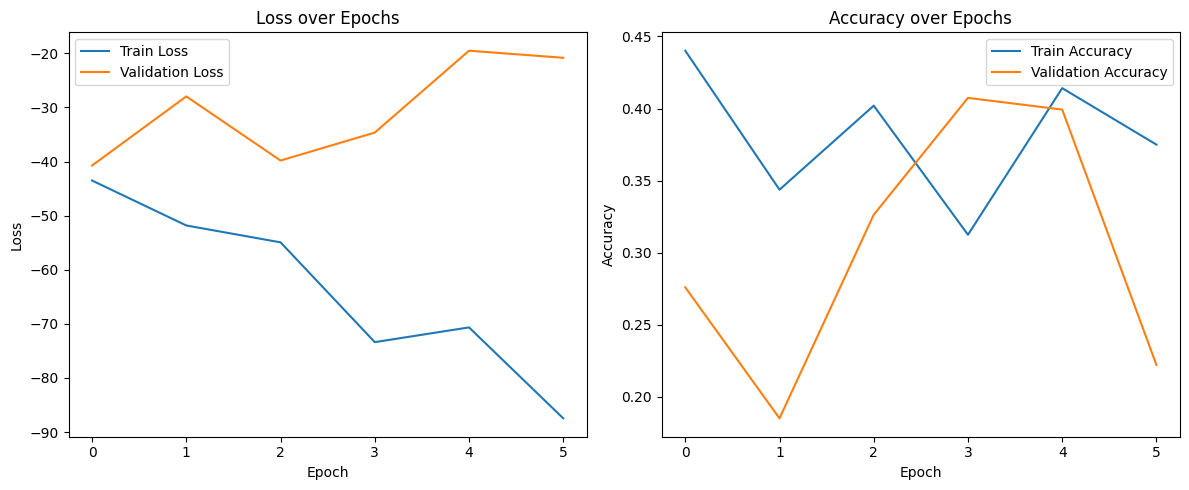

In [122]:
import matplotlib.pyplot as plt

# График потерь
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Выводы о потерях:
- Тренировочные потери стабильно уменьшаются, что указывает на то, что модель хорошо подстраивается под тренировочные данные.
- Валидационные потери, наоборот, увеличиваются и показывают нестабильность. Это явный признак переобучения (overfitting): модель слишком хорошо адаптируется к тренировочным данным, но теряет способность обобщать на новых (валидационных) данных.
- Отрицательные значения потерь выглядят необычно. Обычно функция потерь (например, binary_crossentropy) должна быть положительной. Это может указывать на проблему с реализацией функции потерь или её интерпретацией в вашем коде. Например, если вы случайно изменили знак функции потерь или неправильно настроили выходной слой, это может привести к таким аномалиям.

Выводы о точности:
- Точность на тренировочных данных нестабильна и не показывает устойчивого роста, что необычно, учитывая снижение тренировочных потерь. Это может быть связано с аномалией в функции потерь, о которой упомянуто выше.
- Валидационная точность также сильно колеблется и в целом остаётся низкой (0.20–0.40). Это подтверждает проблему с обобщением модели: она не может хорошо классифицировать новые данные.
- Максимальная точность на валидационных данных (0.40) всё ещё очень низкая для задачи бинарной классификации. Случайная классификация (random guessing) в задаче с двумя классами дала бы точность около 0.50, так что текущая производительность модели хуже случайного угадывания.